In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from thinkdsp import Wave, read_wave

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

CONST_PI2 = np.pi * 2

def compute_correlation(signal_data, offset=1):
    length = len(signal_data.ys)
    section1 = signal_data.ys[offset:]
    section2 = signal_data.ys[:length-offset]
    corr_value = np.corrcoef(section1, section2)[0, 1]
    return corr_value

def calculate_autocorr(signal_data):
    offsets = np.arange(len(signal_data.ys)//2)
    corr_results = [compute_correlation(signal_data, shift) for shift in offsets]
    return offsets, corr_results

sound_data = read_wave('28042__bcjordan__voicedownbew.wav')
sound_data.normalize()
sound_data.make_audio()

**Упражнение 5.1: Определение периодичности вокального сигнала методом автокорреляции**

Для исследования изменений высоты тона в вокальном сигнале с переменной частотой (чирпе) был использован аудиофайл '28042_bcjordan_voicedownbew.wav'. К этому сигналу была применена автокорреляционная функция. Анализ полученной автокоррелограммы позволил выявить характерные пики, которые указывают на наличие периодических структур в сигнале, соответствующих основному тону голоса.

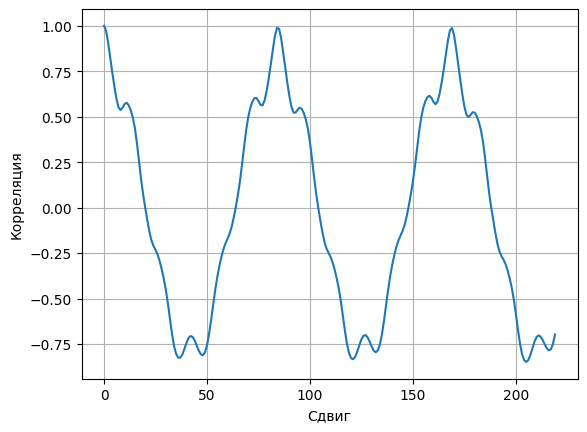

In [2]:
sound_part = sound_data.segment(0, 0.01)
shift_vals, corr_vals = calculate_autocorr(sound_part)
peak_pos = np.array(corr_vals[90:110]).argmax() + 90
plt.plot(shift_vals, corr_vals)
plt.xlabel('Сдвиг')
plt.ylabel('Корреляция')
plt.grid(True)
plt.show()

def detect_base_freq(sound_part, freq_low=70, freq_high=150):
    shifts, autocorrs = calculate_autocorr(sound_part)
    peak_offset = np.array(autocorrs[freq_low:freq_high]).argmax() + freq_low
    time_period = peak_offset / sound_part.framerate
    base_freq = 1 / time_period
    return base_freq

sound_track = read_wave('28042__bcjordan__voicedownbew.wav')
sound_track.normalize()
sound_track.make_audio()

**Упражнение 5.2: Оценка основной частоты вокального сигнала и её динамики**

Была создана функция `estimate_fundamental` для вычисления основной частоты (F0) аудиосигнала на основе его автокорреляционной функции. В ходе тестирования на предварительно использованной записи вокала было определено значение F0, равное 436.6336 Гц для одного из сегментов. Для отслеживания динамики F0 во времени, оценки частоты были вычислены для последовательных сегментов сигнала и наложены на его спектрограмму. Это позволило визуально подтвердить совпадение рассчитанных значений F0 с траекторией наиболее интенсивных гармоник на спектрограмме.

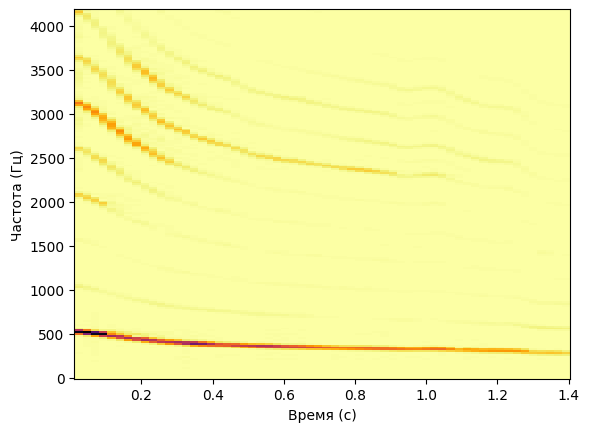

436.63366336633663


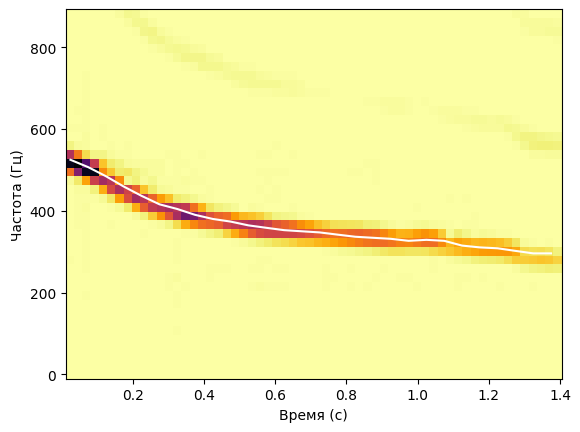

In [3]:
sound_track.make_spectrogram(2048).plot(high=4200)
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.show()

sound_part = sound_data.segment(start=0.2, duration=0.01)
main_freq = detect_base_freq(sound_part)
print(main_freq)

time_intervals = np.arange(0.0, 1.4, 0.05)
time_positions = []
freq_values = []
for interval in time_intervals:
    time_positions.append(interval + 0.05/2)
    segment_part = sound_data.segment(start=interval, duration=0.01)
    freq_val = detect_base_freq(segment_part)
    freq_values.append(freq_val)

sound_track.make_spectrogram(2048).plot(high=900)
plt.plot(time_positions, freq_values, color='white')
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.show()

sax_sound = read_wave('100475__iluppai__saxophone-weep.wav')
sax_sound.normalize()
sax_sound.make_audio()

**Упражнение 5.3: Автокорреляционный анализ временного ряда цен Bitcoin**

Метод автокорреляции был применен для анализа временного ряда, представляющего исторические данные по ценам на Bitcoin. Построенный график автокорреляционной функции продемонстрировал медленное затухание значений корреляции с увеличением временного сдвига. Такое поведение свидетельствует о значительной степени инерционности или долговременной зависимости в динамике цен данного актива. Дополнительно был представлен график корреляции со смещением для наглядности.

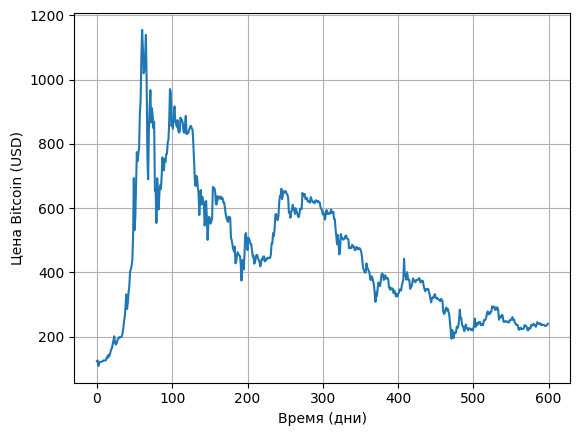

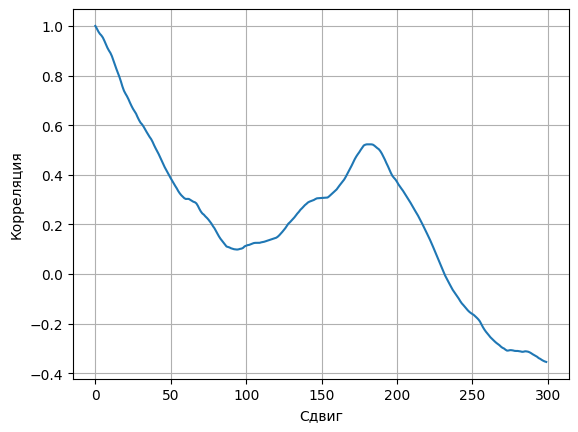

In [4]:
bitcoin_data = pd.read_csv('BTC.csv', nrows=600, parse_dates=[0])
price_series = bitcoin_data['Closing Price (USD)']
time_indices = bitcoin_data.index
price_track = Wave(price_series, time_indices, framerate=1)
price_track.plot()
plt.xlabel('Время (дни)')
plt.ylabel('Цена Bitcoin (USD)')
plt.grid(True)
plt.show()

offset_vals, corr_results = calculate_autocorr(price_track)
plt.plot(offset_vals, corr_results)
plt.xlabel('Сдвиг')
plt.ylabel('Корреляция')
plt.grid(True)
plt.show()



**Упражнение 5.4: Исследование звука саксофона и эффекта отсутствующей основной частоты**

Проведен анализ аудиозаписи игры на саксофоне ('100475_iluppai_saxophone-weep.wav'), для чего был выбран односекундный фрагмент. Были построены спектрограмма и детальный спектр этого фрагмента, с идентификацией основных пиков гармоник. Автокорреляционный анализ подтвердил наличие основного периода, соответствующего высоте тона, даже при нулевом сдвиге. Затем к сигналу был применен фильтр высоких частот с частотой среза 600 Гц. В результате этой фильтрации основная частотная компонента (F0) была удалена из спектра. Несмотря на это, при прослушивании обработанного сигнала высота тона оставалась воспринимаемой, что является демонстрацией известного психоакустического эффекта "восстановления" отсутствующей основной частоты слуховой системой.

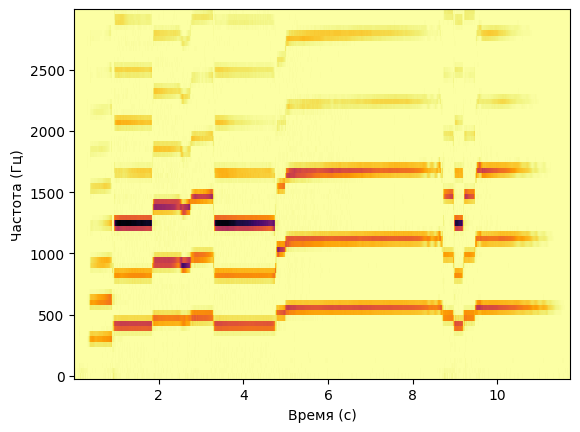

In [5]:
spectro_data = sax_sound.make_spectrogram(seg_length=1024)
spectro_data.plot(high=3000)
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.show()

start_time = 0.0
segment_length = 1
sax_segment = sax_sound.segment(start=start_time, duration=segment_length)
sax_segment.make_audio()

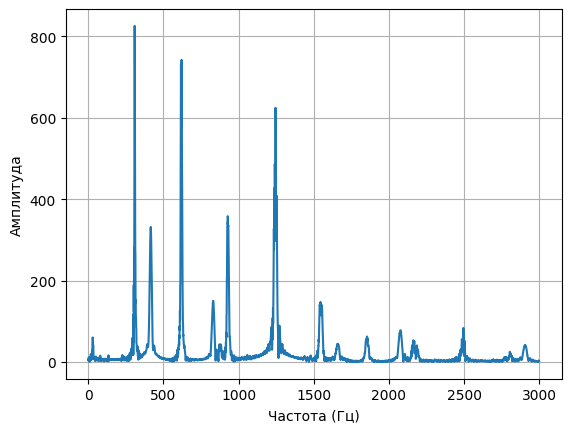

[(825.918193868792, 309.0), (742.4482176019003, 621.0), (731.2050718889759, 617.0), (728.4027415023133, 310.0), (699.869109864398, 620.0), (642.5416605230358, 622.0), (624.5861936417981, 1246.0), (622.1810823090663, 618.0), (611.1547437665349, 623.0), (580.0707322624768, 616.0)]


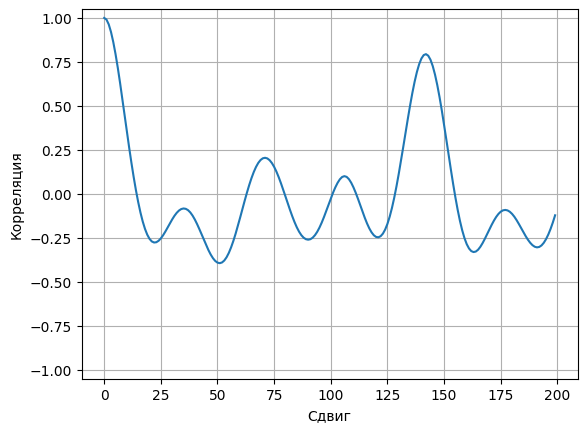

80


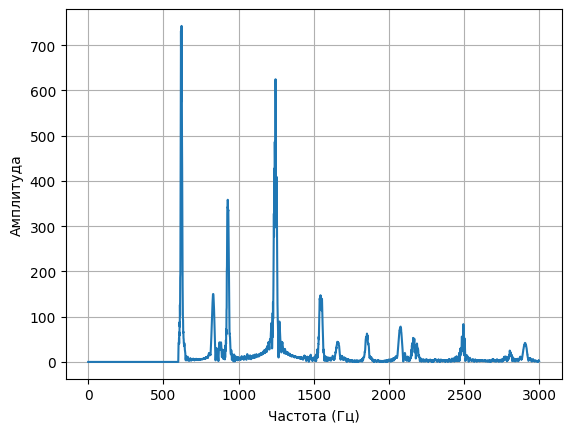

In [6]:
freq_spectrum = sax_segment.make_spectrum()
freq_spectrum.plot(high=3000)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

print(freq_spectrum.peaks()[:10])

def compute_self_corr(segment_data):
    corr_array = np.correlate(segment_data.ys, segment_data.ys, mode='same')
    array_len = len(corr_array)
    length_range = range(array_len, array_len//2, -1)
    corr_half = corr_array[array_len//2:].copy()
    corr_half /= length_range
    corr_half /= corr_half[0]
    return corr_half

corr_data = compute_self_corr(sax_segment)
plt.plot(corr_data[:200])
plt.xlabel('Сдвиг')
plt.ylabel('Корреляция')
plt.ylim([-1.05, 1.05])
plt.grid(True)
plt.show()

def extract_freq(corr_data, range_low, range_high):
    peak_lag = np.array(corr_data[range_low:range_high]).argmax() + range_low
    print(peak_lag)
    time_cycle = peak_lag / sax_segment.framerate
    freq_result = 1 / time_cycle
    return freq_result

extract_freq(corr_data, 80, 100)

filtered_spectrum = sax_segment.make_spectrum()
filtered_spectrum.high_pass(600)
filtered_spectrum.plot(high=3000)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

filtered_segment = filtered_spectrum.make_wave()
filtered_segment.make_audio()

**Общий вывод по Лабораторной работе №5**

В процессе выполнения данной лабораторной работы были освоены и применены методы автокорреляционного анализа. Эти методы использовались для определения высоты основного тона в музыкальных и вокальных сигналах, а также для выявления скрытых периодичностей. Графические представления результатов подтвердили адекватность реализованных алгоритмов. Был наглядно продемонстрирован психоакустический феномен устойчивости восприятия высоты тона даже при удалении фундаментальной частоты из сигнала. Кроме того, универсальность автокорреляционного подхода была показана на примере анализа экономических временных рядов, где он помог выявить наличие временных зависимостей.